# Elección conjunto de datos

Se ha elegido un conjunto de datos correspondiente a datos de clientes de tarjetas de crédito de Taiwan desde abril del 2005 hasta septiembre de 2005. Este conjunto de datos incluye datos demográficos, incumplimientos de pago, datos del crédito e historial de pago.
Está disponible en kaggle en el siguiente enlace:
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

Las variables que incluye el conjunto de datos son:

ID: ID de cada cliente

LIMIT_BAL: limite de crédito de cada cliente.

SEX: Género (1=hombre, 2=mujer)

EDUCATION: (1=graduado escolar, 2=universidad, 3=instituto, 4=otros, 5=desconocido, 6=desconocido)

MARRIAGE: estado civil (1=casado, 2=soltero, 3=otros)

AGE: Edad en años

PAY_0-PAY_6: Estado de pago para los meses de septiembre a abril. Los valores positivos indican los meses que se deben en cada mes.

BILL_AMT1-BILL_AMT6: cantidad dispuesta en dólares para los meses de septiembre a abril.

PAY_AMT1-PAY_AMT6: cantidad del pago anterior para los meses de septiembre a abril.

default.payment.next.month: (0=paga al mes siguiente, 1=no paga al mes siguiente)

# Análisis exploratorio

Importamos todo lo necesario y cargamos el conjunto de datos.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt # plotting
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.naive_bayes import GaussianNB
data = pd.read_csv("C:/Users/maria/Downloads/UCI_Credit_Card.csv", encoding = "latin-1")

In [2]:
#comprobamos que no hay valores vacíos
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [3]:
data.shape

(30000, 25)

Describimos los datos. 

In [4]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Y aquí podemos ver la información de los datos.
No nos encontramos con ningun dato faltante. Tenmos integers para los datos demográficos y para el estado de pagos.
Tenemos floats para el resto de las variables.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Vemos aquí los primeros datos del dataset.

In [6]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0,50000.0,500000.0,100000.0,140000.0,20000.0
SEX,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,3.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0
AGE,24.0,26.0,34.0,37.0,57.0,37.0,29.0,23.0,28.0,35.0
PAY_0,2.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.0
PAY_2,2.0,2.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-2.0
PAY_3,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,2.0,-2.0
PAY_4,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0


Aquí vemos los histogramas de cada característica para cada clase.

In [7]:
data.rename(columns={'default.payment.next.month':'morosos'}, inplace=True)

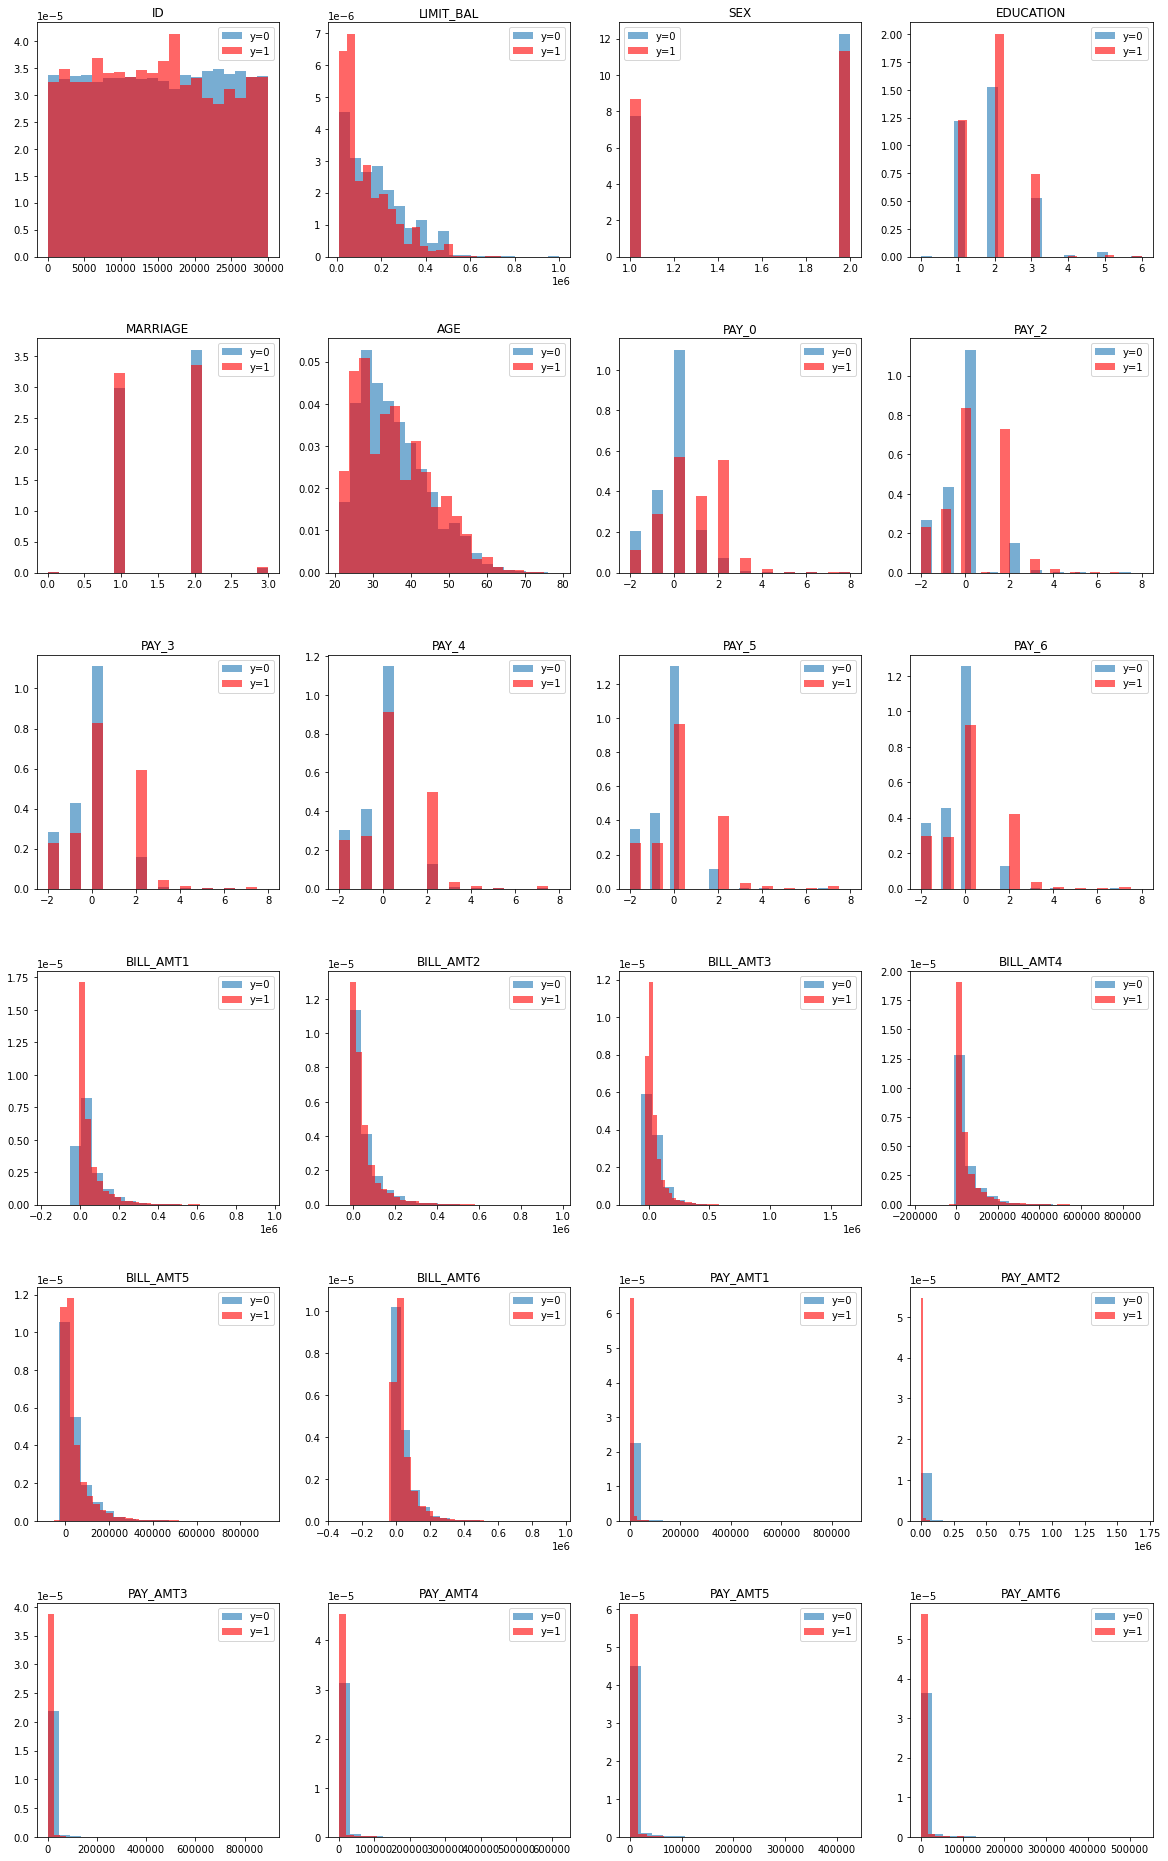

In [8]:
plt.figure(figsize=(20,14))

idx_0 =  data['morosos'] == 0
idx_1 =  data['morosos'] == 1

for i, feature in enumerate(data.columns.drop(['morosos'])):
    plt.subplot(6, 4, i+1)   
    plt.hist(data.loc[idx_0,feature],density=1, bins=20, alpha=0.6, label='y=0')
    plt.hist(data.loc[idx_1,feature],density=1, bins=20, facecolor='red', alpha=0.6, label='y=1')
    plt.legend()
    plt.title(feature)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.9, 
                    wspace=0.2, 
                    hspace=0.35)
plt.show()


Vemos que las clases se solapan bastente, por lo que va a ser difícil de clasificar.

Creamos la matriz de correlaciones. Como podemos observar las que tienen más correlación son las de BILL_AMT1-BILL_AMT6 y luego las de PAY_0-PAY_6. Ambos conjuntos de variables tiene una correlación positiva.

In [9]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,morosos
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


Para simplificar, cambiamos el nombre de la variable default.payment.next.month, por morosos.

Vemos aquí la distribución de los "morosos", un 22% no pagará al mes siguiente, mientras que un 78% si lo hará.

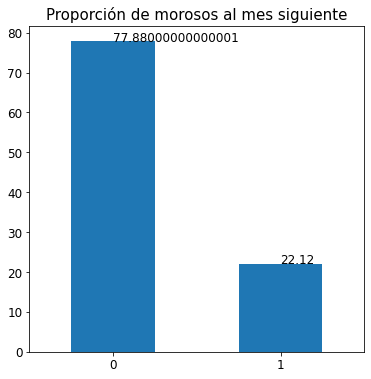

In [10]:
def_cnt = (data.morosos.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Proporción de morosos al mes siguiente", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

Como podemos ver en la siguiente matriz de confusión, la probabiliad de no pagar al mes siguiente es dependiente del estado de pagos de los pasados 6 meses. 


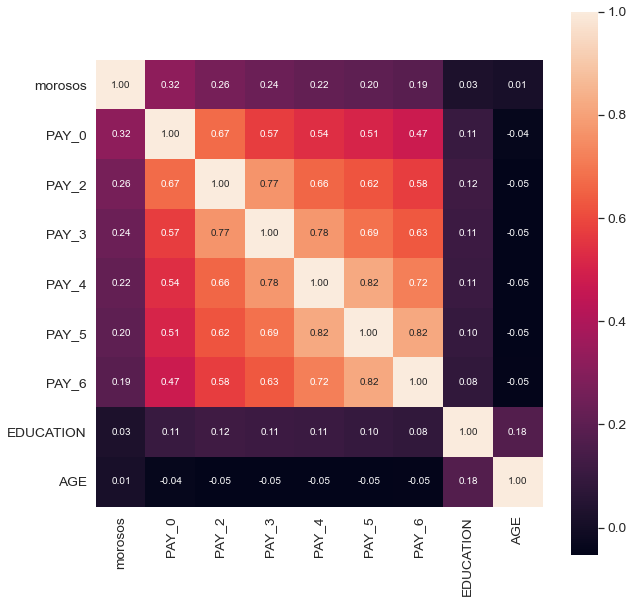

In [11]:
#saleprice correlation matrix
k = 9 #number of variables for heatmap
corrmat = data.corr()
cols = corrmat.nlargest(k, 'morosos')['morosos'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Aquí vamos a deshechar la variable ID, porque no la necesitamos para hacer el análsis

In [12]:
data = data.drop(["ID"], axis=1)

# Caso de negocio

A una entidad financiera, le interesará saber cuales son los clientes que no van a pagar al mes siguiente, para poder gestionar de mejor manera el riesgo. De esta manera, si saben de antemanos cuales son los clientes que no van a pagar de antemano, pueden tomar medidas cautelares, como retener el saldo unos días antes, o no conceder más crédito.


# Algoritmo seleccionado

El algotritmo Naive Bayes se trata de un algoritmo de clasificación, que puede predecir variables multiclase o binarias, en este caso va a predecir una variable binaria (si pagan o no). Por otra parte, es un algoritmo de aprendizaje supervisado, al tener de antemano las etiquetas de los datos que tiene que clasificar.

### Características:

Se asume que las variables predictoras son independientes entre si. Es decir, que la presencia de una cierta característica no está relacionada con la presencia de otra. Aunque hemos visto que hay 

Se basa en el teorema de Bayes: $P(A|B) =\dfrac{P(B|A)P(A)}{P(B)}$.


### Funcionamiento:

Calculan la probabilidad de que ocurra cierto evento, dadas algunas probabilidades de eventos anteriores. Por ejemplo, en nuestro caso tendremos primero la probabilidad de que paguen o no paguen al mes siguiente(que sea "moroso" o no). Sabemos que en un 22% de los casos no van a pagar, esta sería nuestra información "anterior". Luego, tendríamos para cada característica la probabilidad de que pasara dado que (no) paga al mes siguiente. Ejemplo: la probabilidad que no pague en septiembre dado que no paga al mes siguiente. Estas nuevas probabilidades, que saca el algoritmo para cada característica son la información "posterior". Para poder clasificar en cierta clase se multiplicará la probabilidad anterior de esta por la multiplicación de las probabilidades posteriores de cada característica. Al final, se clasificará en la clase cuya probabilidad sea más alta. 

Una vez conluído el análisis exploratorio, vamos a empezar con el modelado para intentar predecir el pago o impago del mes siguiente. La variable objetivo va a ser la de "morosos".

In [13]:
#dividimos los datos en 2 conjuntos de datos, uno para entrenar el modelo y el otro para testear
X_train, X_test, y_train, y_test = train_test_split(
                                        data.drop('morosos', axis = 'columns'),
                                        data['morosos'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [14]:
#entrenamos el modelo y realizamos las predicciones
modelNBC = GaussianNB()
modelNBC.fit(X_train,y_train)
predictionsNBC = modelNBC.predict(X_test)

0.366875
0.38016666666666665
              precision    recall  f1-score   support

           0       0.88      0.22      0.36      4617
           1       0.26      0.90      0.40      1383

    accuracy                           0.38      6000
   macro avg       0.57      0.56      0.38      6000
weighted avg       0.74      0.38      0.37      6000



Text(87.18, 0.5, 'Predicción')

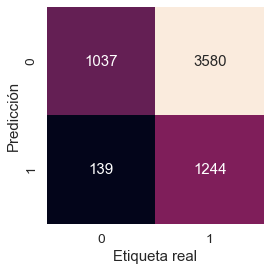

In [15]:
#Imprimimos a continuación los resultados
print(modelNBC.score(X_train,y_train))
print(modelNBC.score(X_test,y_test))
print(classification_report(y_test, predictionsNBC))

mat = confusion_matrix(y_test, predictionsNBC)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Etiqueta real')
plt.ylabel('Predicción')

# Métricas de bondad

Como vemos hay diferentes métricas de bondad. Vamos a analizarlas a continuación. 

Accuracy: es el porcentaje de aciertos del modelo, es decir: (verdaderos positivos + verdaderos negativos)/total.

Precision: verdaderos positivos/ (verdaderos positivos + falsos positivos).

Recall/sensitivity: verdaderos positivos/(verdaderos positivos + falsos negativos).

Dada la naturaleza de los datos (solo un 22% de los clientes no paga al mes siguiente), nos es más relevante las métricas precision o recall que accuracy. Ya que conseguiríamos un 78% de accuracy solo prediciendo que nos van a pagar, cuando en realidad no nos aporta nada. 
Con la métrica de precision, podremos saber cuantos de los morosos que hemos predecido, lo son en realidad. Supondría una pérdida de rentabilidad poner restricciones a clientes cuando realmente van a pagar.
Con la métrica de sensitivity podremos saber cuantos de los morosos hemos detectado, ya que nos interesa clasificar el mayor número de ellos.
Entonces nos interesará una combinación de las dos métricas anteriores, esto es: el f1-score.

# Hiperparámetros

Los hiperparámetros son valores utilizados durante el proceso de entrenamiento para configurar el modelo. En este modelo hay dos hiperparámetros: priors y var_smoothing. Priors: son las probabilidades de las clases: si se especifican, no están ajustados a los datos. Var_smoothing: Porción de la mayor variación de todas las características que se agrega a las variaciones para la estabilidad del cálculo. Una manera de optimizarlos es  con la función GridSearch. Con este procedimiento, damos al modelo varios posibles valores del hiperparámetro, se entrena el modelo varias veces, usando una validación cruzada. Luego, este devuelve el valor del hiperparámetro que optimiza el algoritmo.


In [16]:
param_grid = {'var_smoothing': [1e-7,1e-8,1e-9,1e-10]}

grid = GridSearchCV(GaussianNB(), param_grid, cv = 10)

grid.fit(X_train, y_train)
#probamos los distintos valores para el hiperparametro var smoothing, con cross validartion 10 veces, luego lo entrenmos cada uno

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-07, 1e-08, 1e-09, 1e-10]})

In [17]:
print("Best parameters found: ",grid.best_params_)
print(grid.best_score_)
#aqui selecciona el mejor hiperparametro y su score (Accuracy)

Best parameters found:  {'var_smoothing': 1e-10}
0.5047916666666665


Por ejemplo, aquí el mejor de los valores para el hiperparámetro es 1e-10.

0.5044583333333333
0.526
Accuracy: 0.526
              precision    recall  f1-score   support

           0       0.88      0.44      0.59      4617
           1       0.30      0.80      0.44      1383

    accuracy                           0.53      6000
   macro avg       0.59      0.62      0.51      6000
weighted avg       0.75      0.53      0.56      6000



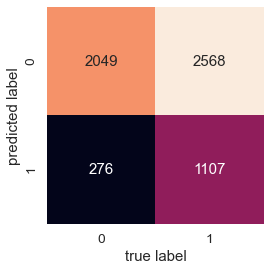

In [18]:
#repetimos el proceso anterior pero con el parámetro modificado
prediction_GNBg = grid.predict(X_test)
print(grid.score(X_train,y_train))
print(grid.score(X_test,y_test))
print("Accuracy:" , accuracy_score(y_test, prediction_GNBg))
print(classification_report(y_test, prediction_GNBg))
mat = confusion_matrix(y_test, prediction_GNBg)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Vemos que con el cambiio de hiperparámetro mejora el parámetro precision y empeora el de recall. Sin embargo, el parámetro combinado f1, mejora: pasa de 0.4 a 0.44.

# Selección de variables

Seleccionamos de manera semi manual las variables. Utilizamos el método de SelectKBest, para seleccionar las mejores características, aquellas con una puntuación mejor. Le hemos dado distintos valores hasta conseguir los mejores resultados, dando los mejores resultados con 6 características. Es una especie de método wrapper.

In [19]:
X=data.drop(['morosos'], axis=1)
y=data['morosos']
 
best=SelectKBest(score_func=f_classif,k=6)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], dtype='object')


In [20]:
datos =  data[['morosos','PAY_0', 'PAY_2','PAY_3', 'PAY_4','PAY_5','PAY_6'] ]

In [21]:
#dividimos los datos en 2 conjuntos de datos, uno para entrenar el modelo y el otro para testear
X_trains, X_tests, y_trains, y_tests = train_test_split(
                                        datos.drop('morosos', axis = 'columns'),
                                        datos['morosos'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [22]:
param_grid = {'var_smoothing': [1e-7,1e-8,1e-9,1e-10]}

%time grid = GridSearchCV(GaussianNB(), param_grid, cv = 10,scoring='precision')

%time grid.fit(X_trains, y_trains)

Wall time: 0 ns
Wall time: 973 ms


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-07, 1e-08, 1e-09, 1e-10]},
             scoring='precision')

In [23]:
print("Best parameters found: ",grid.best_params_)
print(grid.best_score_)

Best parameters found:  {'var_smoothing': 1e-07}
0.5652195526538467


0.5649762282091918
0.5948186528497409
Accuracy: 0.526
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4617
           1       0.59      0.42      0.49      1383

    accuracy                           0.80      6000
   macro avg       0.72      0.67      0.68      6000
weighted avg       0.78      0.80      0.79      6000



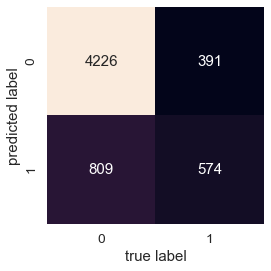

In [24]:
prediction_GNBs = grid.predict(X_tests)
print(grid.score(X_trains,y_trains))
print(grid.score(X_tests,y_tests))
print("Accuracy:" , accuracy_score(y_test, prediction_GNBg))
print(classification_report(y_tests, prediction_GNBs))
mat = confusion_matrix(y_tests, prediction_GNBs)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Vemos que tras la selección de características se llega a un f1 de 0.49 (con un aumento bastante significativo de la métrica precision y una disminución también significativa del recall).

# Escalado

Vamos a ver a continuación que efecto tiene el escalado en nuestro modelo.

In [25]:
scaler = preprocessing.StandardScaler().fit(X_trains)
X_scaled = scaler.transform(X_trains)
X_test_scaled = scaler.transform(X_tests)

Repetimos el proceso anterior pero con el escalado.

In [26]:
param_grid = {'var_smoothing': [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7]}

%time grids = GridSearchCV(GaussianNB(), param_grid, cv = 10, scoring='precision')

%time grid.fit(X_scaled, y_trains)

Wall time: 0 ns
Wall time: 678 ms


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-07, 1e-08, 1e-09, 1e-10]},
             scoring='precision')

In [27]:
print("Best parameters found: ",grid.best_params_)
print(grid.best_score_)

Best parameters found:  {'var_smoothing': 1e-07}
0.5652195526538467


0.5649762282091918
0.5948186528497409
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4617
           1       0.59      0.42      0.49      1383

    accuracy                           0.80      6000
   macro avg       0.72      0.67      0.68      6000
weighted avg       0.78      0.80      0.79      6000



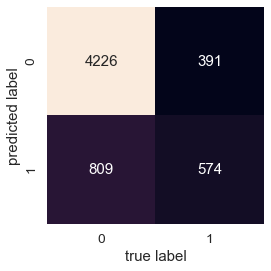

In [28]:
prediction_GNBsc = grid.predict(X_test_scaled)
print(grid.score(X_scaled,y_trains))
print(grid.score(X_test_scaled,y_tests))
print("Accuracy:" , accuracy_score(y_tests, prediction_GNBsc))
print(classification_report(y_tests, prediction_GNBsc))
mat = confusion_matrix(y_tests, prediction_GNBsc)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Vemos que no hay cambios muy significativos. Es ligeramente peor respeto a la métrica f1. Por lo que podemos decir que no es necesario escalar los datos, aunque es una buena práctca.

# Interpretación del modelo

No tiene un ajuste muy bueno, ya que solo detecta un 42% de los morosos. 
Por otra parte, de los que clasifica como morosos, el 59% lo es en realidad.
No es un buen clasificador pero ya mejora algo la capacidad predictora de la entidad financiera. 
La accuracy podría ser del 0.78 si simpre predicieran que no son "morosos", frente al 0.58 que conseguimos ahora. Sin embargo, esto no aporta nada al negocio, ya que predeciria un 0% de morosos. 

# Overfitting

In [29]:
target_var = 'morosos'
y = data[target_var].values.copy()

feature_vars = [ 'PAY_0', 'PAY_2','PAY_3', 'PAY_4','PAY_5','PAY_6',]

# creamos la matriz de features
X = data[feature_vars].values.copy()

In [30]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)

# evaluate model
scores = cross_validate(grid, X, y, scoring='precision', cv=cv, return_train_score = True)

In [31]:
scores

{'fit_time': array([0.90646839, 0.80661249, 0.6752131 , 0.68564534, 0.76303887,
        0.61488485, 0.65000391, 0.7374537 , 0.61939979, 0.67776513]),
 'score_time': array([0.00400519, 0.00404334, 0.00199509, 0.00199842, 0.002002  ,
        0.00201917, 0.0030005 , 0.00199866, 0.00597167, 0.00405931]),
 'test_score': array([0.60042735, 0.56026786, 0.57986871, 0.57738095, 0.55833333,
        0.57649667, 0.57640232, 0.53024194, 0.54485777, 0.59587629]),
 'train_score': array([0.56686859, 0.57162758, 0.56910569, 0.56924883, 0.57126195,
        0.56950569, 0.5685721 , 0.57386629, 0.57195829, 0.56725146])}

Vemos aquí los valores de la métrica "precision" probados en 10 repeticiones con validación cruzda, tienen unos valores consistentes, tanto para el dataset de entrenamiento como en el de test. Por lo que parece que no hay overfitting.

# Función de coste

Se optimiza mediante el método de máxima verosimilitud (MLE).

Aquí tenemos la función probabilística con la que se optimiza el algoritmo:

$ \mathcal{L}(\phi_y, \phi_{j|y}) = \prod_{i=1}^m p(x^{(i)},y^{(i)}; \phi_y , \phi_{j|y}) $

Esta sería la función de probabilidad anterior, la probabiliad de pertenencia de cada clase:

$ \phi_y = \frac{\sum_{i=1}^m \mathcal{L} \{ y^{(i)}=1 \}}{m} $

Esta sería la función de probabilidad posterior, la probabiliad de que tenga j característica dado que pertenence a cierta clase:


$ \phi_{j|y} = \frac{\sum_{i=1}^m \mathcal{L} \{ x_j^{(i)}=1 , y^{(i)}=1 \}}{\sum_{i=1}^m \mathcal{L} \{ y^{(i)}=1 \}} $

# Variables más relevantes

In [32]:
model = GaussianNB(var_smoothing=1e-07)

est = model.fit(X_trains, y_trains).sigma_
est1=est[1:]
est1= [ item for elem in est1 for item in elem]
print(est1)


[1.894023733198667, 2.2243452171121665, 2.2537372492739163, 2.2973109829783267, 2.2236004902404574, 2.2452105433502543]


In [33]:
model = GaussianNB(var_smoothing=1e-10)

est = model.fit(X_trains, y_trains).sigma_
est1=est[1:]
print(est1)


[[1.89402359 2.22434507 2.25373711 2.29731084 2.22360035 2.2452104 ]]


In [34]:
indices = np.argsort(est1)[::-1]
indices= [ item for elem in indices for item in elem]
indices

[0, 4, 1, 5, 2, 3]

In [35]:
datoss = datos.drop(["morosos"], axis=1)
ranking=datoss.columns[indices]
ranking.to_list()

['PAY_0', 'PAY_5', 'PAY_2', 'PAY_6', 'PAY_3', 'PAY_4']

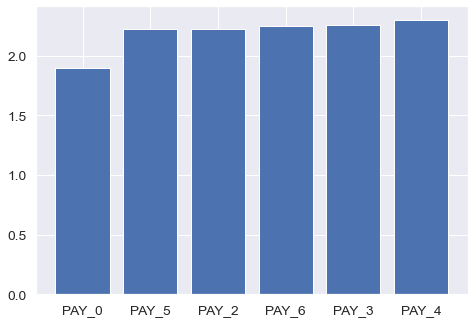

In [36]:
est1= [ item for elem in est1 for item in elem]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ranking,sorted(est1))
plt.show()



Aquí vemos la varianza que aporta cada variable a las clases. Vemos que la que más relevante es la de PAY_4, seguida de PAY_3, PAY_6, PAY_2, PAY_5, PAY_O. Estas son las variables de las que hemos seleccionado, las que mas varianza aportan.